In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = '0'
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' #omit info 
from learnMSA.msa_hmm import Configuration, Align, Visualize
from learnMSA.msa_hmm.SequenceDataset import SequenceDataset

2024-10-22 12:18:49.392779: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-22 12:18:49.401714: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-22 12:18:49.404416: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
I0000 00:00:1729599530.431031   40340 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1729599530.449144   40340 cuda_executor.cc:1015] succ

## learnMSA demo

In this notebook, we will fit a number of HMM models to a dataset of unaligned sequences. 
We will then use the fitted models to align the sequences and compare the results.
Moreover, we will visualize the best (according to an objective criterion) model and alignment.

*This notebook is meant to be a demo for running learnMSA in Python code. Check the readme if you want to run learnMSA from the command line.* 

Change the variables in the following cell to fit your needs.

In [2]:
# Your fasta file with unaligned sequences.

train_filename = "test/data/egf.fasta"
train_filename = "../snakeMSA/data/homfam/train/blm"

# Reference file with aligned sequences that have matching IDs to (potentially a subset of) the 
# sequences in the train_file.
# Replace with empty string if no reference is available.
ref_filename = "test/data/egf.ref"
ref_filename = "../snakeMSA/data/homfam/refs/blm"

# The number of independently trained models.
num_models = 4

# Use sequence weights based on a rapid pre-clustering of the sequences (requires mmseqs2 to be installed)
use_weights = True

# Align long insertions with an external aligner left unaligned by the main MSA stage (requires famsa to be installed).
align_insertions = True

## Run learnMSA from Python (Training + Viterbi alignment)

Training of 4 models on file blm
Configuration: 
{
num_models : 4
transitioner : ProfileHMMTransitioner(
 transition_init=
    {
    begin_to_match : DefaultEntry() , match_to_end : DefaultExit() , 
    match_to_match : DefaultMatchTransition(1) , match_to_insert : DefaultMatchTransition(-1) , 
    insert_to_match : Norm(0, 0.1) , insert_to_insert : Norm(-0.5, 0.1) , 
    match_to_delete : DefaultMatchTransition(-1) , delete_to_match : Norm(0, 0.1) , 
    delete_to_delete : Norm(-0.5, 0.1) , left_flank_loop : Norm(0, 0.1) , 
    left_flank_exit : Norm(-1, 0.1) , right_flank_loop : Norm(0, 0.1) , 
    right_flank_exit : Norm(-1, 0.1) , unannotated_segment_loop : Norm(0, 0.1) , 
    unannotated_segment_exit : Norm(-1, 0.1) , end_to_unannotated_segment : Norm(-9, 0.1) , 
    end_to_right_flank : Norm(0, 0.1) , end_to_terminal : Norm(0, 0.1)
    },
 flank_init=Const(0.0),
 prior=ProfileHMMTransitionPrior(match_comp=1, insert_comp=1, delete_comp=1, alpha_flank=7000, alpha_single=1000000000.

I0000 00:00:1729599538.006681   40340 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1729599538.006901   40340 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1729599538.007058   40340 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1729599538.007244   40340 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

Epoch 1/10


I0000 00:00:1729599540.925246   40340 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1729599540.925483   40340 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1729599540.925667   40340 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1729599540.925877   40340 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

149/149 - 55s - 369ms/step - loss: 797.6307 - loglik: -7.9962e+02 - prior: 1.9887 - aux_loss: 0.0000e+00
Epoch 2/10
149/149 - 38s - 252ms/step - loss: 762.1875 - loglik: -7.6774e+02 - prior: 5.5512 - aux_loss: 0.0000e+00
Epoch 3/10
149/149 - 37s - 245ms/step - loss: 757.2018 - loglik: -7.6359e+02 - prior: 6.3898 - aux_loss: 0.0000e+00
Epoch 4/10
149/149 - 37s - 251ms/step - loss: 754.3755 - loglik: -7.6159e+02 - prior: 7.2137 - aux_loss: 0.0000e+00
Epoch 5/10
149/149 - 40s - 266ms/step - loss: 755.3398 - loglik: -7.6323e+02 - prior: 7.8939 - aux_loss: 0.0000e+00


I0000 00:00:1729599748.815555   40340 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1729599748.815817   40340 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1729599748.815978   40340 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1729599748.816169   40340 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

expansions model 0: [(0, 4), (7, 1), (18, 1), (24, 1), (28, 1), (30, 2), (31, 2), (32, 1), (33, 1), (37, 1), (38, 1), (64, 1), (70, 3), (71, 2), (90, 1), (91, 2), (93, 3), (94, 2), (99, 1), (100, 1), (103, 1), (106, 1), (132, 1), (134, 1), (135, 1), (136, 1), (137, 1), (149, 1), (152, 2), (154, 1), (161, 2), (162, 1), (163, 1), (164, 2), (165, 2), (167, 1), (186, 1), (191, 3), (205, 2), (206, 1), (207, 3), (208, 1), (209, 2), (217, 1), (218, 1), (219, 1), (220, 3), (221, 3), (240, 1), (252, 1), (254, 1), (255, 1), (261, 4)]
discards model 0: [223 224 225]
expansions model 1: [(0, 4), (7, 1), (8, 1), (21, 1), (23, 1), (27, 1), (29, 2), (30, 2), (31, 2), (35, 1), (49, 1), (62, 1), (68, 4), (69, 2), (70, 1), (88, 1), (89, 1), (90, 1), (91, 3), (92, 1), (93, 2), (96, 1), (98, 1), (99, 1), (100, 1), (125, 1), (128, 1), (129, 1), (130, 1), (131, 1), (132, 1), (140, 1), (144, 2), (146, 2), (147, 2), (148, 1), (152, 1), (154, 2), (155, 2), (156, 2), (157, 3), (184, 3), (190, 1), (191, 1), (193

I0000 00:00:1729599762.973614   40340 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1729599762.973827   40340 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1729599762.973958   40340 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1729599762.974133   40340 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

Epoch 1/2


I0000 00:00:1729599765.792542   40340 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1729599765.792750   40340 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1729599765.792878   40340 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1729599765.793035   40340 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

149/149 - 55s - 368ms/step - loss: 750.6444 - loglik: -7.5966e+02 - prior: 9.0167 - aux_loss: 0.0000e+00
Epoch 2/2
149/149 - 41s - 276ms/step - loss: 732.5813 - loglik: -7.4960e+02 - prior: 17.0145 - aux_loss: 0.0000e+00


I0000 00:00:1729599863.875550   40340 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1729599863.875750   40340 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1729599863.875878   40340 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1729599863.876035   40340 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

expansions model 0: [(0, 3), (67, 13), (78, 13), (88, 1), (89, 1), (90, 1), (106, 2), (113, 1), (119, 1), (201, 1), (204, 1), (205, 2), (222, 1), (266, 1), (267, 1), (286, 3), (288, 2), (294, 1), (340, 6)]
discards model 0: [ 11  90 109 110 114 115 116 118 119 120 121 206 207 208 209 210 218 244
 245 246 263 266 267 268 269 270 272 285 289 290 291 292 293 294 295 296
 297 332 333 334 335 336 337 338 339]
expansions model 1: [(0, 3), (46, 1), (65, 11), (76, 19), (87, 1), (90, 1), (121, 1), (129, 1), (130, 2), (207, 1), (208, 2), (219, 1), (267, 1), (287, 2), (291, 1), (345, 8)]
discards model 1: [ 11  92  93 113 114 116 117 118 119 124 195 209 211 212 213 214 246 247
 248 265 268 269 270 271 272 274 286 287 288 289 291 296 297 306 307 326
 327 328 337 338 339 340 341 342 343 344]
expansions model 2: [(0, 3), (41, 1), (77, 24), (81, 3), (89, 1), (106, 2), (118, 2), (125, 1), (201, 1), (206, 2), (219, 1), (267, 1), (289, 2), (329, 1), (344, 7)]
discards model 2: [  3  12  92 109 110 111 1

I0000 00:00:1729599878.790861   40340 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1729599878.791082   40340 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1729599878.791213   40340 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1729599878.791370   40340 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

Epoch 1/2


I0000 00:00:1729599881.629354   40340 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1729599881.629572   40340 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1729599881.629706   40340 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1729599881.629870   40340 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

149/149 - 56s - 375ms/step - loss: 746.9421 - loglik: -7.6132e+02 - prior: 14.3730 - aux_loss: 0.0000e+00
Epoch 2/2
149/149 - 39s - 264ms/step - loss: 731.8145 - loglik: -7.5207e+02 - prior: 20.2574 - aux_loss: 0.0000e+00


I0000 00:00:1729599979.120490   40340 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1729599979.120710   40340 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1729599979.120866   40340 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1729599979.121039   40340 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

expansions model 0: [(0, 3), (81, 11), (108, 22), (119, 1), (144, 1), (146, 2), (147, 2), (149, 1), (230, 1), (231, 2), (237, 1), (238, 1), (245, 1), (268, 3), (285, 1), (286, 2), (287, 1), (298, 2), (299, 2), (300, 3), (301, 2), (350, 5)]
discards model 0: [  1   2   3   4  69  70  71  72  73  74  75  76  77  78  79  80  81  93
  94  95  96  97  98  99 100 101 102 103 104 105 115 116 117 118 136 137
 141 142 230 231 232 241 244 286 287 303 304 305 306 307 308 309 345 346
 347 348 349]
expansions model 1: [(0, 3), (83, 3), (110, 18), (122, 1), (125, 1), (146, 1), (148, 2), (150, 2), (151, 1), (156, 2), (233, 1), (236, 1), (237, 1), (244, 1), (274, 3), (292, 2), (293, 1), (295, 1), (305, 1), (307, 1), (308, 2), (321, 1), (340, 1), (341, 1), (342, 1), (355, 8)]
discards model 1: [  0   1   2   6   7   8   9  68  69  70  71  72  73  74  75  76  77  78
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 119 124 125 126 143 144 145 158 159 236 238 240 241 242 292 3

I0000 00:00:1729599994.664781   40340 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1729599994.665002   40340 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1729599994.665132   40340 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1729599994.665292   40340 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

Epoch 1/10


I0000 00:00:1729599997.620425   40340 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1729599997.620641   40340 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1729599997.620770   40340 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1729599997.620931   40340 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

149/149 - 55s - 370ms/step - loss: 743.2242 - loglik: -7.5873e+02 - prior: 15.5071 - aux_loss: 0.0000e+00
Epoch 2/10
149/149 - 41s - 273ms/step - loss: 729.3530 - loglik: -7.5027e+02 - prior: 20.9135 - aux_loss: 0.0000e+00
Epoch 3/10
149/149 - 39s - 265ms/step - loss: 724.4093 - loglik: -7.4665e+02 - prior: 22.2398 - aux_loss: 0.0000e+00
Epoch 4/10
149/149 - 41s - 272ms/step - loss: 719.4149 - loglik: -7.4274e+02 - prior: 23.3281 - aux_loss: 0.0000e+00
Epoch 5/10
149/149 - 39s - 264ms/step - loss: 719.0981 - loglik: -7.4311e+02 - prior: 24.0081 - aux_loss: 0.0000e+00
Epoch 6/10
149/149 - 39s - 259ms/step - loss: 719.5705 - loglik: -7.4413e+02 - prior: 24.5615 - aux_loss: 0.0000e+00
Time for alignment: 715.1386
Likelihoods:  ['-725.0056', '-727.7414', '-727.0091', '-726.6990']
Mean likelihood:  -726.6137984098281
Selection criterion: AIC
Best model:  0 (0-based)


I0000 00:00:1729600347.818825   40340 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1729600347.819012   40340 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1729600347.819137   40340 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1729600347.819291   40340 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

Aligning 23 insertion slices with famsa.


/home/beckerf/mambaforge/envs/learnMSAdev2/lib/python3.12/site-packages/Bio/SeqRecord.py:228: BiopythonDeprecationWarning: Using a string as the sequence is deprecated and will raise a TypeError in future. It has been converted to a Seq object.
  warnings.warn(


time for generating output: 46.1030
Wrote file test/data/interactive.alignment.fasta
143/143 ━━━━━━━━━━━━━━━━━━━━ 18s 106ms/step
>l=-754.96_t=0.37
.........................................................$IEEFIVNRMRE.......T...R.......IPG.LSV.GIVK..E..................N.E....L.IY.AR..GFGF.R.............NL...........................ER....GLPA............T...............PGT.I.YGIGSVTKSFTA.LSI.LR---------L.A.EEGRLSL........................E...................D.PVDK.........YI.-QL-.-........-.-.-.-.----...............--......-....-..-.....-.-...KL.......................-RIG-EP......V..K.IsH................................HL........L.THTSGIP--AY...................A.E.AG.L..................Glg..D.............................................................L...V..Sfin.........................Aa...D.......DlVsnw............MpVs.F...........M..............................................................R........................................GYE.......VVSR....................P...G....Edw.R.....

/home/beckerf/mambaforge/envs/learnMSAdev2/lib/python3.12/site-packages/keras/src/models/functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['sequences', 'indices']. Received: the structure of inputs=('*', '*')
  warnings.warn(
I0000 00:00:1729600421.119855   40340 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1729600421.120083   40340 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1729600421.120246   40340 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but 

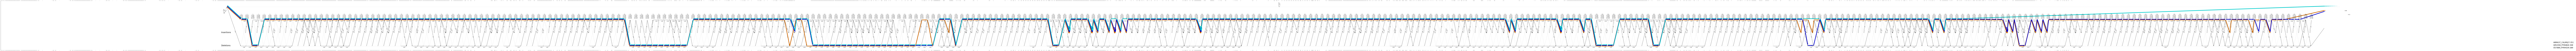

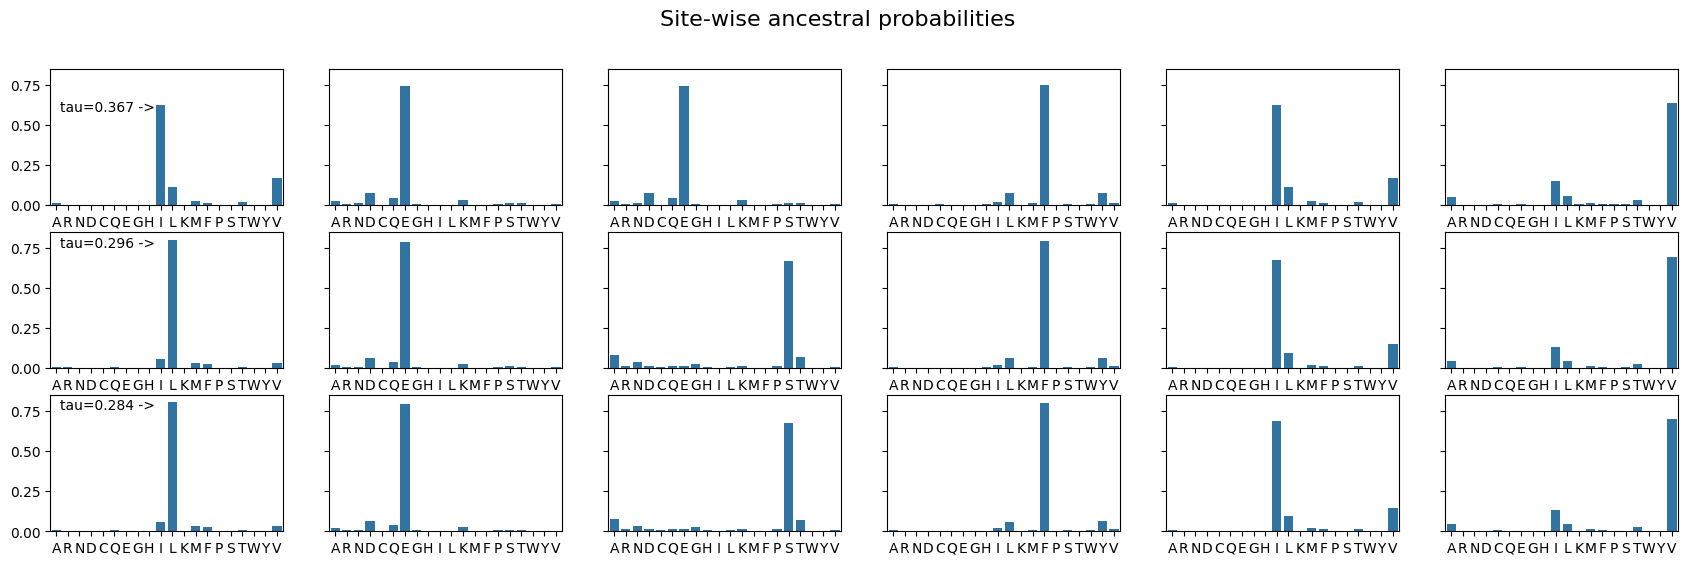

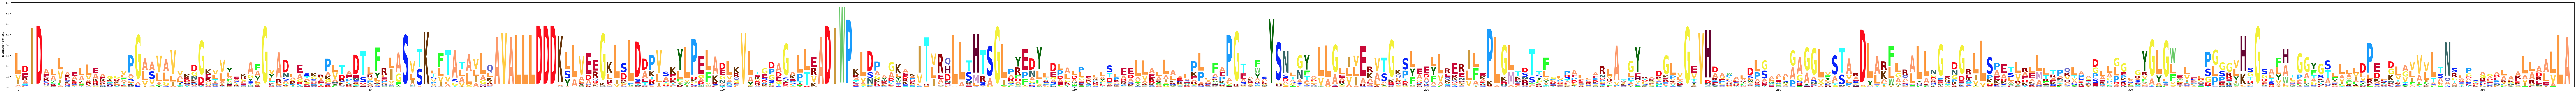

In [3]:
out_filename = "test/data/interactive.alignment.fasta"
config = Configuration.make_default(num_models)
with SequenceDataset(train_filename, fmt="fasta") as data:
    alignment_model = Align.run_learnMSA(data,
                                        out_filename,
                                        config, 
                                        sequence_weights=Align.compute_sequence_weights(train_filename, "tmp") if use_weights else None,
                                        verbose=True,
                                        align_insertions=align_insertions)
    Visualize.print_and_plot(alignment_model, alignment_model.best_model)

In [6]:
!id_list=$(sed -n '/^>/p' {ref_filename} | sed 's/^.//') ; export MAX_N_PID_4_TCOFFEE=10000000 ; t_coffee -other_pg seq_reformat -in test/data/interactive.alignment.fasta -action +extract_seq_list ${{id_list[@]}} +rm_gap > test/data/interactive.projection.fasta

HERE: 4blma
HERE: 3blm
HERE: 1btl
HERE: 1mfo
HERE: 1bul
HERE: 1bsg
HERE: 1bza
HERE: 1shva


In [7]:
!t_coffee -other_pg aln_compare -al1 {ref_filename} -al2 test/data/interactive.projection.fasta -compare_mode sp

[DEBUG_RECONCILIATION:add_sequence]
ddfakleeqfdaklgifaldtgtnrtvayrpderfafastikaltvgvllqqksiedlnqritytrddlvnynpitekhvdtgmtlkeladaslrysdnaaqnlilkqiggpeslkkelrkigdevtnperfepelnevnpgetqdtstaralvtslrafaledklpsekrellidwmttgdalikrnragvpdgwevdtgakaaygtrndisaiiwppkgdpvvlavlssrkkdakyddkliaeatkvvmkaln
DDFAKLEEQFDAKLGIFALDTGTNRTVAYRPDERFAFASTIKALTVGVLLQQKSIEDLNQRITYTRDDLVNYNPITEKHVDTGMTLKELADASLRYSDNAAQNLILKQIGGPESLKKELRKIGDEVTNPERFEPELNEVNPGETQDTSTARALVTSLRAFALEDKLPSEKRELLIDWMKRNTTGDALIRAGVPDGWEVADKTGAASYGTRNDIAIIWPPKGDPVVLAVLSSRDKKDAKYDDKLIAEATKVVMKALN

pid 48314 -- DISCREPANCY:4blma in [/var/tmp/tco/tcowi3wvbv_48314//48318483143] and  [/var/tmp/tco/tcowi3wvbv_48314//48318483142]

[DEBUG_RECONCILIATION:add_sequence]
kelndlekkynahigvyaldtksgkevkfnsdkrfayastskainsailleqvpynklnkkvhinkddivayspilekyvgkditlkalieasmtysdntannkiikeiggikkvkqrlkelgdkvtnpvryeielnyyspkskkdtstpaafgktlnkliangklskenkkflldlmlnnksgdtlikdgvpkdykvdsgaakiqtasrndvayfvypkgqsepivlviftnknksdkpndklisetaksvmkef
KELNDLEKKYNAHIGVYALDTKSGKEV